In [1]:
# Packages

import pandas as pd
import pickle
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import shutil
import re

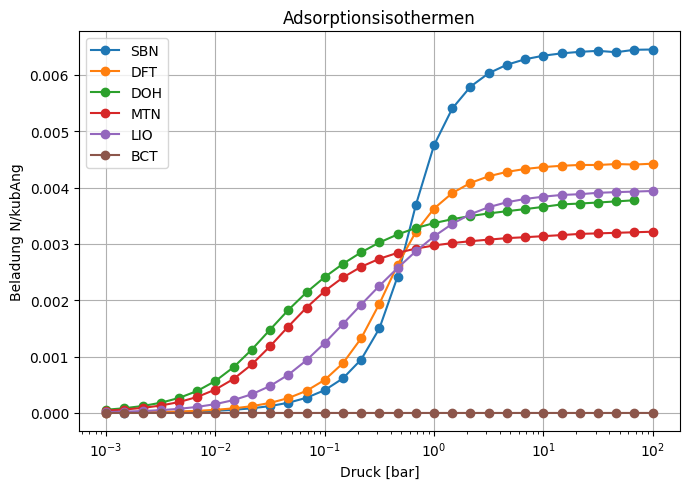

In [41]:
data = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/isotherm_300K/2025_10_13_DB_100Bins_64grid_isotherme.csv")

structures = ["SBN", "DFT", "DOH", "MTN", "LIO", "BCT"]
plt.figure(figsize=(7, 5))

for structure in structures:
# Daten für diese Struktur filtern
    df_sel = data[data["structure_name"] == structure]
    df_sel = df_sel.sort_values("pressure_bar")
    plt.plot(df_sel["pressure_bar"], df_sel["beladung_atoms"]/df_sel["volume_kubAng"], marker="o", lw=1.5, label=structure)
# Plot
#plt.plot(df_sel["pressure_bar"], df_sel["beladung_mol_per_kg"], marker="o", lw=1.5)

plt.title(f"Adsorptionsisothermen")
plt.xlabel("Druck [bar]")
plt.legend()
plt.ylabel("Beladung N/kubAng")
plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
data = data[data["pressure_bar"]==1]
top_atoms = data.nlargest(5, "beladung_atoms")[["structure_name", "pressure_bar", "beladung_atoms"]]
top_mol   = data.nlargest(5, "beladung_mol_per_kg")[["structure_name", "pressure_bar", "beladung_mol_per_kg"]]

print("\nTop 5 nach Beladung_atoms:")
print(top_atoms)

print("\nTop 5 nach Beladung_mol_per_kg:")
print(top_mol)




Top 5 nach Beladung_atoms:
     structure_name  pressure_bar  beladung_atoms
1070            MWF           1.0      186.356472
1875            PAU           1.0       83.319670
5843            LTN           1.0       82.452086
4231            IMF           1.0       27.421751
3239            PWN           1.0       26.809209

Top 5 nach Beladung_mol_per_kg:
     structure_name  pressure_bar  beladung_mol_per_kg
7207            SBN           1.0             4.897143
4510            DFT           1.0             3.408096
1535            DOH           1.0             3.054484
2061            MTN           1.0             2.880422
2681            LIO           1.0             2.872610
